In [5]:
import numpy as np
import matplotlib.pyplot as plt

##### Visualization

In [6]:
def plot_k_means(data, centroids, assignments, k, iteration):
    """Plot the data points and centroids for visualization."""
    plt.clf()  # Clear the current figure
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i in range(k):
        # Plot data points assigned to each cluster
        cluster_data = data[assignments == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
        
        # Plot centroids
        plt.scatter(centroids[i, 0], centroids[i, 1], s=200, c=colors[i], edgecolors='k', marker='*', label=f'Centroid {i+1}')
    
    plt.title(f'K-means Clustering: Iteration {iteration}')
    plt.legend()
    plt.pause(0.5)  # Pause to display the plot

##### K_means

In [2]:
def initialize_centroids_randomly(data, k):
    indices = np.random.permutation(data.shape[0])
    centroids = data[indices[:k]]
    return centroids

def assign_datapoints(data, centroids):
    distance = np.sqrt(((data - centroids[:,np.newaxis])**2).sum(axis = 2))
    return np.argmin(distance, axis=0)

def update_centroids(data, assignments, k):
    centroids = np.array([data[assignments==i].mean(axis=0) for i in range(k)])
    return centroids

In [7]:
def k_means(data, k=3,max_iter=300):
    
    # initialize centroids
    centroids = initialize_centroids_randomly(data, k)
    
    for i in range(max_iter):
        
        old_centroids = centroids
        # assign data point to centroids
        
        assignments = assign_datapoints(data, centroids)
        # update centroids
        centroids = update_centroids(data, assignments, k)
        plot_k_means(data, centroids, assignments, k, i + 1)  # Plot at each iteration
        if np.any(centroids==old_centroids):
            print('k_means done')
            break
        
    return centroids, assignments

##### Test

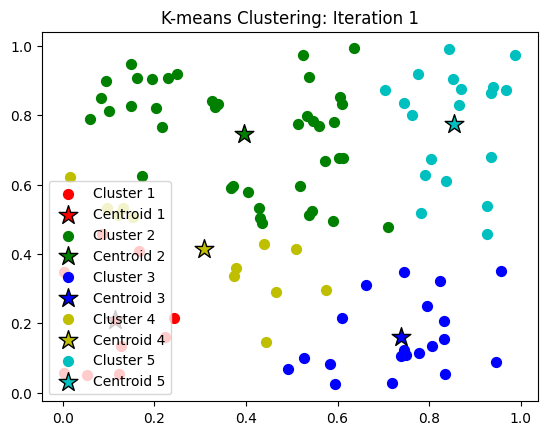

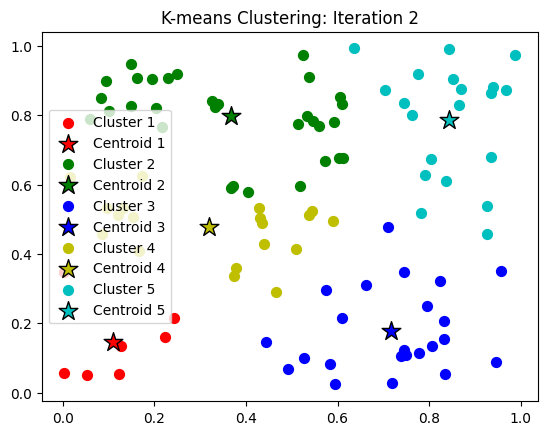

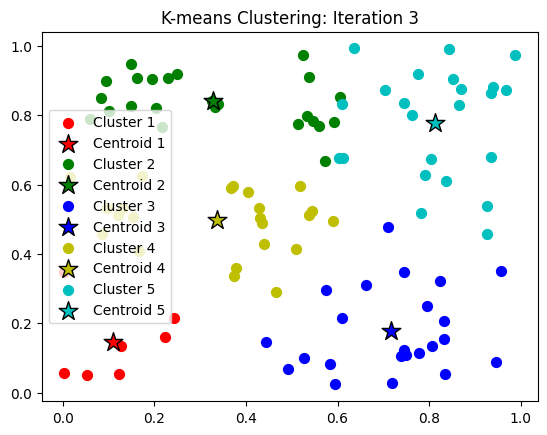

k_means done
centroids: [[0.11057489 0.14569085]
 [0.32820203 0.8400184 ]
 [0.71709226 0.17847441]
 [0.33643569 0.49729166]
 [0.81312894 0.77847057]]
assignments: [2 2 0 4 4 3 2 1 3 4 1 3 3 1 0 4 4 1 1 1 3 3 1 4 2 1 1 2 3 1 4 4 2 0 3 2 3
 3 1 1 2 4 3 3 2 4 1 0 3 1 4 1 4 3 1 2 0 3 4 4 2 2 4 2 4 2 2 3 4 3 3 4 1 1
 0 0 3 2 4 4 1 2 1 1 3 4 4 3 1 2 2 2 4 2 1 1 2 3 3 2]


In [8]:
dataset = np.random.rand(100, 2)

centroids, assignments = k_means(dataset, k=5)

print('centroids:',centroids)
print('assignments:',assignments)